# Tarea 3

Según wikipedia, abalone: "is a common name for any of a group of small to very large marine gastropod molluscs in the family Haliotidae". Para esta tarea vamos a intentar predecir el número de anillos de un abalone (asumiremos que es una variable continua) basado en: 
1. Length / continuous / mm / Longest shell measurement 
2. Diameter / continuous / mm / perpendicular to length 
3. Height / continuous / mm / with meat in shell 
4. Whole weight / continuous / grams / whole abalone 
5. Shucked weight / continuous / grams / weight of meat 
6. Viscera weight / continuous / grams / gut weight (after bleeding) 
7. Shell weight / continuous / grams / after being dried 

Realmente, queremos evaluar como se puede sobreentrenar un modelo, y cual es la mejor técnica para evitar su sobreentrenamiento. Para ello:
0. Los datos ya han sido preprocesados, usted solo tiene que trabajar con ellos. 
1. Cree un modelo de red neuronal sobreentrenado. Es decir, cree una arquitectura que usted estime conveniente (puede cambiar todo los parámetros que estime conveniente), y muestre que el modelo se sobreentrena graficando el MSE vs Epochs para los datos de entrenamienot y test. Hint, para este problema no use k-fold cross validation, basta con una separación de los datos (1 punto).

A partir de este punto, todas las preguntas se responderan basado en 10-fold cross validation con shuffle=True y random_state=0 (KFold(n_splits=10, shuffle=True,random_state=0))

2. ¿Dada la arquitectura seleccionada, cuál es la distribucion del error de los datos de entrenamiento vs test? ¿Es la diferencia de los errores estadísticaticamente significativa? (1 punto).
3. Dada la arquitectura seleccionada, aplique early stopping ¿cuál es la distribucion del error de los datos de entrenamiento vs test? ¿Es la diferencia de los errores estadísticaticamente significativa? (1 punto).
4. Dada la arquitectura seleccionada, aplique dropout ¿cuál es la distribucion del error de los datos de entrenamiento vs test? ¿Es la diferencia de los errores estadísticaticamente significativa? (1 punto).
5. Dada la arquitectura seleccionada, aplique regularization ¿cuál es la distribucion del error de los datos de entrenamiento vs test? ¿Es la diferencia de los errores estadísticaticamente significativa? (1 punto).
6. ¿Cuál de todos los métodos para evitar sobreentrenamiento seleccionaria? Justifique su respuesta (1 punto).

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data=pd.read_csv("abalone_original.csv")
X=data.iloc[:,1:8] #eliminando la primera columna que es categórica
y=data.iloc[:,8]

#Estandarizando los datos entre 0 y 1 y guardando los valores
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
newDataTrain=scaler.transform(X)
# newDataTrain
#X
#y

Modelo sobre entrenado:

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import *

#Creating and training a model
inputLayer = layers.Input(shape=(7,))
hiddenLayer = layers.Dense(10000, activation='relu', use_bias = False)(inputLayer)
# hiddenLayer1 = layers.Dense(100, activation='linear', use_bias = False)(hiddenLayer)
# hiddenLayer2 = layers.Dense(100, activation='linear', use_bias = False)(hiddenLayer1)
# hiddenLayer3 = layers.Dense(100, activation='linear', use_bias = False)(hiddenLayer2)
# hiddenLayer4 = layers.Dense(100, activation='linear', use_bias = False)(hiddenLayer3)
# hiddenLayer5 = layers.Dense(100, activation='linear', use_bias = False)(hiddenLayer4)
# hiddenLayer6 = layers.Dense(100, activation='linear', use_bias = False)(hiddenLayer5)
# hiddenLayer7 = layers.Dense(100, activation='linear', use_bias = False)(hiddenLayer6)
# hiddenLayer8 = layers.Dense(100, activation='linear', use_bias = False)(hiddenLayer7)
outputLayer = layers.Dense(1, activation='linear', use_bias = True)(hiddenLayer)

feedForward = models.Model(inputLayer, outputLayer)
# feedForward.compile(loss='MeanSquaredError', optimizer = 'adam', metrics=['MeanSquaredError'])

In [ ]:
MSE_training = []
MSE_validation = []

for size in np.arange(0.1, 1.0, 0.1):
  feedForward.compile(loss='MeanAbsoluteError', optimizer = 'adam', metrics=['MeanSquaredError'])

  X_train, X_test, y_train, y_test = train_test_split(newDataTrain, y, test_size=size, random_state=42)
  eval = feedForward.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=512, epochs=100, verbose=0, shuffle=True)

  MSE_training.append(np.mean(eval.history['mean_squared_error']))
  MSE_validation.append(np.mean(eval.history['val_mean_squared_error']))

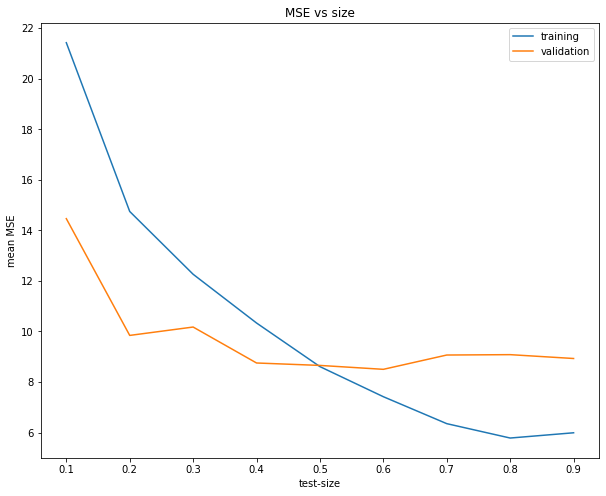

In [ ]:
size = np.arange(0.1, 1.0, 0.1)

plt.figure(figsize=(10, 8))
plt.title('MSE vs size')
plt.plot(size, MSE_training, label='training')
plt.plot(size, MSE_validation, label='validation')
plt.ylabel('mean MSE')
plt.xlabel('test-size')
plt.legend()
plt.show()

In [ ]:
feedForward.compile(loss='MeanAbsoluteError', optimizer = 'adam', metrics=['MeanSquaredError'])

X_train, X_test, y_train, y_test = train_test_split(newDataTrain, y, test_size=0.99, random_state=42)
eval = feedForward.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=512, epochs=500, verbose=0, shuffle=True)

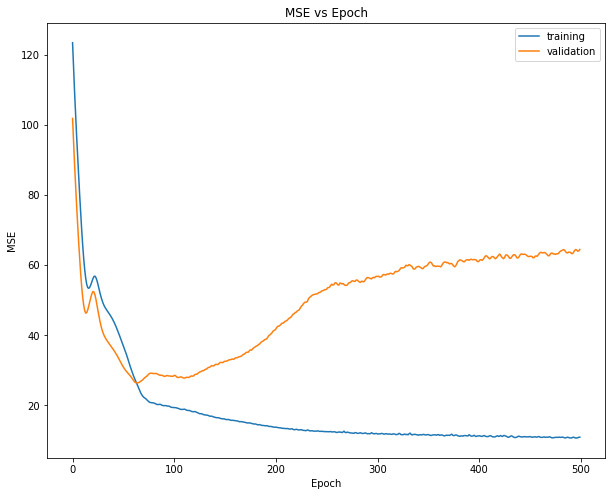

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('MSE vs Epoch')
plt.plot(eval.history['mean_squared_error'], label='training')
plt.plot(eval.history['val_mean_squared_error'], label='validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
# plt.ylim(4, 15)
# plt.xlim(0, 100)
plt.legend()
plt.show()

Modelo con Kfold Cross-validation:

In [ ]:
from sklearn.model_selection import KFold

MSE_training = []
MSE_validation = []

kfold =  KFold(n_splits=10, shuffle=True,random_state=0)

feedForward.compile(loss='MeanAbsoluteError', optimizer = 'adam', metrics=['MeanSquaredError'])

for indexTrainData, indexTestData in kfold.split(data):
  # feedForward.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=512, epochs=500, verbose=0, shuffle=True)
  eval = feedForward.fit(newDataTrain[indexTrainData], y[indexTrainData], validation_data=(newDataTrain[indexTestData], y[indexTestData]), epochs=500, batch_size=512, verbose=0, shuffle=True)
  MSE_training.append(eval.history['mean_squared_error'])
  MSE_validation.append(eval.history['val_mean_squared_error'])

print(round(np.mean(MSE_training), 2), ' +-', round(np.std(MSE_training), 2))
print(round(np.mean(MSE_validation), 2), ' +-', round(np.std(MSE_validation), 2))

3.96  +- 0.81
4.26  +- 0.87


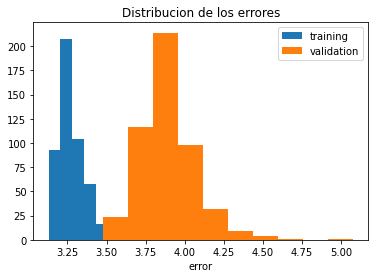

In [ ]:
plt.title('Distribucion de los errores')
plt.hist(MSE_training[9], bins=10, label='training')
plt.hist(MSE_validation[9], bins=10, label='validation')
plt.xlabel('error')
plt.legend()
plt.show()

Distribución error entrenamiento: 4.83 +- 3.19

Distribución error test: 4.81  +- 1.58

2. ¿Es la diferencia de los errores estadísticaticamente significativa?

Bajo el supuesto de que la última iteración entrega una representación general de la precisión del modelo, se puede observar la distribución de los errores demuestra una diferencia significativa, ya que la media del error de los datos de test no pertenece al grado de significancia (0.05) del error de los datos de entrenamiento.

Early stopping:

In [ ]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=50, restore_best_weights=True, verbose=0)

MSE_training1 = []
MSE_validation1 = []

kfold =  KFold(n_splits=10, shuffle=True,random_state=0)

feedForward.compile(loss='MeanAbsoluteError', optimizer = 'adam', metrics=['MeanSquaredError'])

for indexTrainData, indexTestData in kfold.split(data):
  # feedForward.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=512, epochs=500, verbose=0, shuffle=True)
  eval = feedForward.fit(newDataTrain[indexTrainData], y[indexTrainData], validation_data=(newDataTrain[indexTestData], y[indexTestData]), epochs=500, batch_size=512, verbose=0, shuffle=True, callbacks=[earlystopping])
  MSE_training1.append(eval.history['mean_squared_error'])
  MSE_validation1.append(eval.history['val_mean_squared_error'])

# print(np.mean(MSE_training1), '+-', np.std(MSE_training1))
# print(np.mean(MSE_validation1), '+-', np.std(MSE_validation1))

In [ ]:
mean_MSE_training = []
for kfold in MSE_training1:
  mean_MSE_training.append(np.mean(kfold))

mean_MSE_validation = []
for kfold in MSE_validation1:
  mean_MSE_validation.append(np.mean(kfold))

print(round(np.mean(mean_MSE_training), 2), '+-', round(np.std(mean_MSE_training), 2))
print(round(np.mean(mean_MSE_validation), 2), '+-', round(np.std(mean_MSE_validation), 2))

3.42 +- 0.06
3.55 +- 0.43


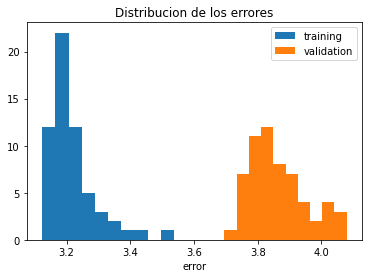

In [ ]:
plt.title('Distribucion de los errores')
plt.hist(MSE_training1[9], bins=10, label='training')
plt.hist(MSE_validation1[9], bins=10, label='validation')
plt.xlabel('error')
plt.legend()
plt.show()

Distribución error entrenamiento: 3.42 +- 0.06

Distribución error test: 3.55 +- 0.43

3. ¿Es la diferencia de los errores estadísticaticamente significativa?

Sigue siendo estadísticamente significativa, sin embargo, vemos que la curva se suaviza, el error medio disminuye y la curva tiende hacia la izquierda.

Dropout:

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import *
from sklearn.model_selection import KFold

#Creating and training a model
inputLayer = layers.Input(shape=(7,))
#dropoutLayer1 = layers.Dropout(0.1)(inputLayer)
hiddenLayer = layers.Dense(10000, activation='relu', use_bias = False)(inputLayer)
dropoutLayer2 = layers.Dropout(0.1)(hiddenLayer)
outputLayer = layers.Dense(1, activation='linear', use_bias = True)(dropoutLayer2)
feedForward = models.Model(inputLayer, outputLayer)
feedForward.compile(loss='MeanAbsoluteError', optimizer = 'adam', metrics=['MeanSquaredError'])

#Resultados:
MSE_training2 = []
MSE_validation2 = []

#Cross validation:
kfold =  KFold(n_splits=10, shuffle=True,random_state=0)

for indexTrainData, indexTestData in kfold.split(data):
  # feedForward.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=512, epochs=500, verbose=0, shuffle=True)
  eval = feedForward.fit(newDataTrain[indexTrainData], y[indexTrainData], validation_data=(newDataTrain[indexTestData], y[indexTestData]), epochs=500, batch_size=512, verbose=0, shuffle=True)
  MSE_training2.append(eval.history['mean_squared_error'])
  MSE_validation2.append(eval.history['val_mean_squared_error'])

print(round(np.mean(MSE_training2), 2), '+-', round(np.std(MSE_training2), 2))
print(round(np.mean(MSE_validation2), 2), '+-', round(np.std(MSE_validation2), 2))


5.12 +- 3.23
5.05 +- 2.21


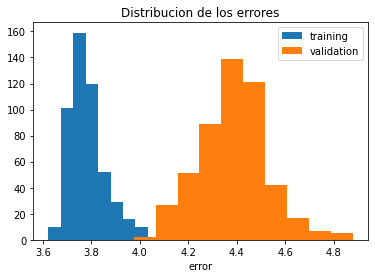

In [ ]:
plt.title('Distribucion de los errores')
plt.hist(MSE_training2[9], bins=10, label='training')
plt.hist(MSE_validation2[9], bins=10, label='validation')
plt.xlabel('error')
plt.legend()
plt.show()

Distribución error entrenamiento: 5.12 +- 3.23

Distribución error test: 5.05 +- 2.21

4. ¿Es la diferencia de los errores estadísticaticamente significativa?

La diferencia de los errores sigue siendo estadísticamente significativa, los errores medios son mucho más altos. Pero, el error medio y la desviación estandar de los datos de prueba es menor que los datos de entrenamiento 

Regularization:

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import *
from sklearn.model_selection import KFold

#Creating and training a model
inputLayer = layers.Input(shape=(7,))
hiddenLayer = layers.Dense(10000, kernel_regularizer=regularizers.l2(0.005), activation='relu', use_bias = False)(inputLayer)
outputLayer = layers.Dense(1, activation='linear', use_bias = True)(hiddenLayer)
feedForward = models.Model(inputLayer, outputLayer)
feedForward.compile(loss='MeanAbsoluteError', optimizer = 'adam', metrics=['MeanSquaredError'])

#Resultados:
MSE_training3 = []
MSE_validation3 = []

#Cross validation:
kfold =  KFold(n_splits=10, shuffle=True,random_state=0)

for indexTrainData, indexTestData in kfold.split(data):
  # feedForward.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=512, epochs=500, verbose=0, shuffle=True)
  eval = feedForward.fit(newDataTrain[indexTrainData], y[indexTrainData], validation_data=(newDataTrain[indexTestData], y[indexTestData]), epochs=500, batch_size=512, verbose=0, shuffle=True)
  MSE_training3.append(eval.history['mean_squared_error'])
  MSE_validation3.append(eval.history['val_mean_squared_error'])

print("Training: ", round(np.mean(MSE_training3), 2), '+-', round(np.std(MSE_training3), 2))
print("Validation: ", round(np.mean(MSE_validation3), 2), '+-', round(np.std(MSE_validation3), 2))

Training:  5.71 +- 3.2
Validation:  5.33 +- 2.14


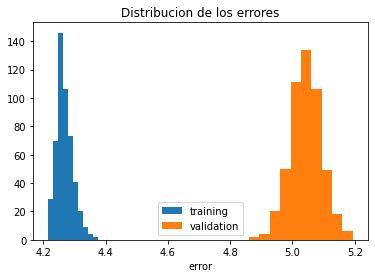

In [ ]:
plt.title('Distribucion de los errores')
plt.hist(MSE_training3[9], bins=10, label='training')
plt.hist(MSE_validation3[9], bins=10, label='validation')
plt.xlabel('error')
plt.legend()
plt.show()

Distribución error entrenamiento: 5.71 +- 3.2

Distribución error test: 5.33 +- 2.14

5. ¿Es la diferencia de los errores estadísticaticamente significativa?

Nuevamente, la diferencia de los errores es significativa estadísticamente. Este caso es muy similar al caso anterior. Sin embargo, en este caso, la media de los errores y las desviaciones estándar son mayores.

6. ¿Cuál de todos los métodos para evitar sobreentrenamiento seleccionaria?

Basandonos en los resultados obtenidos, el mejor método para disminuir el sobre-entrenamiento, con un error medio de 3.42 +- 0.06 para los datos de entrenamiento y con un error medio de 3.55 +- 0.43 para los datos de prueba, correspondería a 'Early Stopping'. El error medio para ambos casos es mucho menor en comparación a los otros métodos.